In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pth_in = os.path.join('..', 'data')
pth_data = os.path.join(pth_in, 'modeling', 'predict')
pth_out = os.path.join('..', 'figures', 'embeddings')

In [3]:
df_summary = pd.read_csv(os.path.join(pth_in, 'summary.csv'))
df_summary.loc[3, 'Name'] = df_summary.loc[3, 'Name'].replace(' ', '\n')
name_dict = df_summary.set_index('Source').Name.to_dict()
df_summary

,Source,Name,Species,Trajectory,Age,Description
0,GSE136689,Splanchnic Mesoderm,mmusculus,True,E8.5-9.5,Foregut organogenesis dataset showing interact...
1,GSE162534,Primitive Streak,mmusculus,True,Early-Late Streak,Gastrulation dataset analyzing EMT programs du...
2,GSE201257,Schwann Cell Precursor,mmusculus,True,E9.5-Adult,Neural crest cell atlas describing diversifica...
3,GSE229103,Neuromesodermal\nProgenitor,mmusculus,True,E8.5,Developmental dataset describing bipotent neur...
4,HCAEmbryonicHindlimb,Embryonic Hindlimb,hsapiens,True,PCW5-9,Embryonic hindlimb atlas focusing on spatial a...
5,rRNAModifications,Cranial Neural Crest,mmusculus,True,E8.5-10.5,Neural crest cell dataset showing the bifurcat...
6,CCCA,Curated Cancer Cell Atlas,hsapiens,False,Primary & Metastatic,Cancer atlas containing 70+ curated single-cel...
7,EMTHallmark,EMT Hallmark,hsapiens,False,NaN,Genes defining epithelial-mesenchymal transiti...
8,TCGA,The Cancer Genome Atlas,hsapiens,False,Primary & Metastatic,The Cancer Genome Atlas dataset of >40 cancer ...


In [4]:
adata = sc.read_h5ad(os.path.join(pth_data, 'training.h5ad'))
adata

AnnData object with n_obs × n_vars = 1575028 × 856
    obs: 'Stages', 'Clusters', 'Type', 'LineageAnnotations', 'celltype', 'trajectory', 'training', 'sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'plates', 'devtime', 'location', 'total_counts_ERCC', 'pct_counts_ERCC', 'doublet_scores', 'CytoTRACE', 'Gut_neuron', 'Sensory', 'Symp', 'enFib', 'ChC', 'Gut_glia', 'NCC', 'Mesenchyme', 'Melanocytes', 'SatGlia', 'SC', 'BCC', 'conflict', 'assignments', 'Hub', 'Hub_leiden', 'total_counts_ribo', 'pct_counts_ribo', 'T+ Sox2+', 'batch', 'percent_mito', 'n_counts', 'bh_pval', 'region', 'tissue', 'adj_stage', 'adj_sample', 'S_score', 'G2M_score', 'phase', 'leiden_R', 'celltype_original', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.1', 'seurat_clusters', 'age', 'RNA_snn_res.0.5', 'ident', 'velocity_self_transition', 'source', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score'

In [5]:
adata_tcga = sc.read_h5ad(os.path.join(pth_data, 'TCGA.h5ad'))
adata_tcga

AnnData object with n_obs × n_vars = 10496 × 856
    obs: '_PATIENT', 'cancer type abbreviation', 'age_at_initial_pathologic_diagnosis', 'gender', 'race', 'ajcc_pathologic_tumor_stage', 'clinical_stage', 'histological_type', 'histological_grade', 'initial_pathologic_dx_year', 'menopause_status', 'birth_days_to', 'vital_status', 'tumor_status', 'last_contact_days_to', 'death_days_to', 'cause_of_death', 'new_tumor_event_type', 'new_tumor_event_site', 'new_tumor_event_site_other', 'new_tumor_event_dx_days_to', 'treatment_outcome_first_course', 'margin_status', 'residual_tumor', 'OS', 'OS.time', 'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction', 'source', 'latent_z'

In [6]:
tcga_names_dict = {
    'ACC'  : 'Adrenocortical Cancer',
    'BLCA' : 'Bladder Cancer',
    'BRCA' : 'Breast Cancer',
    'CESC' : 'Cervical Cancer',
    'CHOL' : 'Bile Duct Cancer',
    'COAD' : 'Colon Cancer',
    'DLBC' : 'Large B-cell Lymphoma',
    'ESCA' : 'Esophageal Cancer',
    'GBM'  : 'Glioblastoma',
    'HNSC' : 'Head and Neck Cancer',
    'KICH' : 'Kidney Chromophobe',
    'KIRC' : 'Kidney Clear Cell Carcinoma',
    'KIRP' : 'Kidney Papillary Cell Carcinoma',
    'LAML' : 'Acute Myeloid Leukemia',
    'LGG'  : 'Lower Grade Glioma',
    'LIHC' : 'Liver Cancer',
    'LUAD' : 'Lung Adenocarcinoma',
    'LUSC' : 'Lung Squamous Cell Carcinoma',
    'MESO' : 'Mesothelioma',
    'OV'   : 'Ovarian Cancer',
    'PAAD' : 'Pancreatic Cancer',
    'PCPG' : 'Pheochromocytoma & Paraganglioma',
    'PRAD' : 'Prostate Cancer',
    'READ' : 'Rectal Cancer',
    'SARC' : 'Sarcoma',
    'SKCM' : 'Melanoma',
    'STAD' : 'Stomach Cancer',
    'TGCT' : 'Testicular Cancer',
    'THCA' : 'Thyroid Cancer',
    'THYM' : 'Thymoma',
    'UCEC' : 'Endometrioid Cancer',
    'UCS'  : 'Uterine Carcinosarcoma',
    'UVM'  : 'Ocular Melanomas'}

adata_tcga.obs['cancer type'] = \
    (adata_tcga.obs['cancer type abbreviation']
     .map(tcga_names_dict))

/tmp/ipykernel_1958001/11403935.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ix = (df_plt.groupby('category')


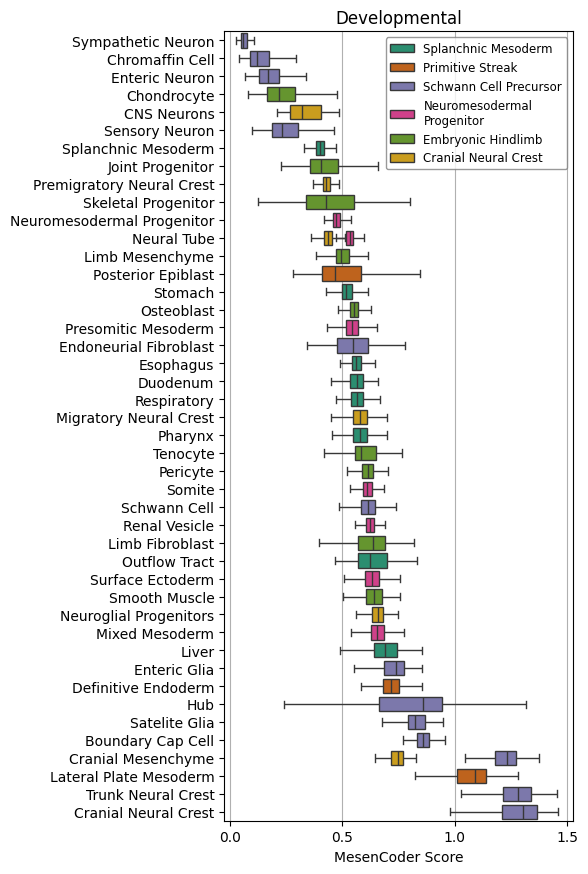

In [7]:
# plot developmental celltypes
fig, ax = plt.subplots(1, 1, figsize = (4.5, 10.25))
dev = (adata.obs.celltype != 'Malignant')
df_plt = adata[dev].obs.copy()
df_plt['hue'] = df_plt.source.map(name_dict)
ix = (df_plt.groupby('category')
      .latent_z.mean()
      .sort_values().index)
sns.boxplot(df_plt,
            x = 'latent_z',
            y = 'category',
            hue = 'hue',
            dodge = False,
            order = ix,
            showfliers = False,
            palette = 'Dark2',
            ax = ax)
leg = ax.legend(fontsize = 8.5,
                edgecolor = 'gray')
ax.set_xlabel('MesenCoder Score')
ax.set_ylabel('')
ax.set_title('Developmental')
ax.set_xlim([-.025, 1.525])
ax.set_xticks(np.arange(0, 1.51, .5).round(1))
ax.grid(axis = 'x')
fn = os.path.join(pth_out, 'development.svg')
plt.savefig(fn, bbox_inches = 'tight')

/tmp/ipykernel_1958001/4221739151.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ix = (df_plt.groupby('category')


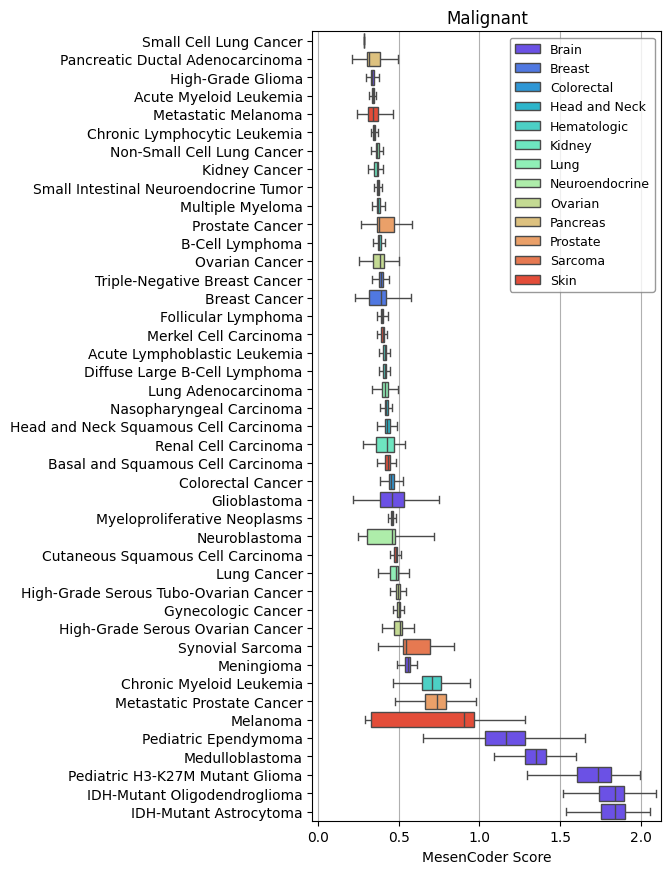

In [8]:
# plot malignant celltypes (3CA)
fig, ax = plt.subplots(1, 1, figsize = (4.5, 10.25))
df_plt = adata[~dev].obs.copy()
ix = (df_plt.groupby('category')
      .latent_z.median()
      .sort_values().index)
sns.boxplot(df_plt,
            x = 'latent_z',
            y = 'category',
            hue = 'Category',  # 3CA
            dodge = False,
            order = ix,
            showfliers = False,
            palette = 'rainbow',
            ax = ax)
leg = ax.legend(fontsize = 9,
                edgecolor = 'gray')
ax.set_xlabel('MesenCoder Score')
ax.set_ylabel('')
ax.set_title('Malignant')
ax.set_xlim([-.033, 2.125])
ax.set_xticks(np.arange(0, 2.1, .5).round(1))
ax.grid(axis = 'x')
fn = os.path.join(pth_out, 'malignant.svg')
plt.savefig(fn, bbox_inches = 'tight')

/tmp/ipykernel_1958001/3018958621.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ix = (df_plt.groupby('cancer type')


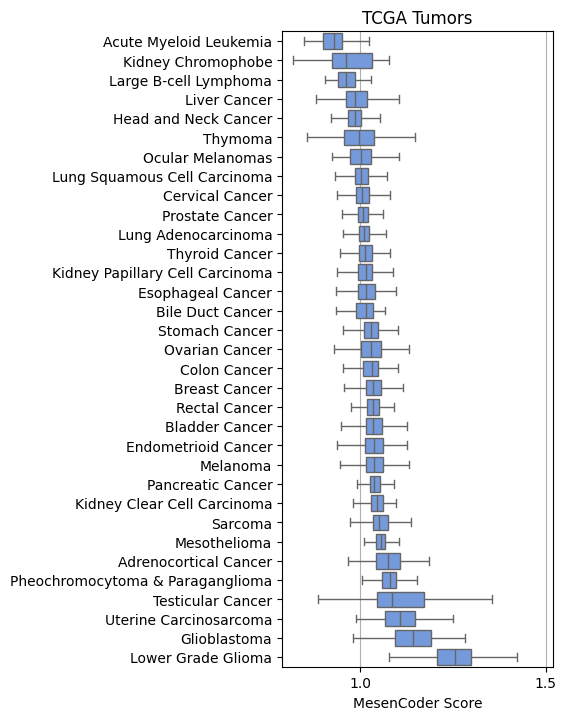

In [9]:
# plot bulk tumors (TCGA)
fig, ax = plt.subplots(1, 1, figsize = (3.5, 8.25))
df_plt = adata_tcga.obs.copy()
ix = (df_plt.groupby('cancer type')
      .latent_z.median()
      .sort_values().index)
sns.boxplot(df_plt,
            x = 'latent_z',
            y = 'cancer type',
            color = 'cornflowerblue',
            order = ix,
            showfliers = False,
            ax = ax)
ax.set_xlabel('MesenCoder Score')
ax.set_ylabel('')
ax.set_title('TCGA Tumors')
ax.set_xlim(right = 1.52)
ax.set_xticks([1., 1.5])
ax.grid(axis = 'x')
fn = os.path.join(pth_out, 'tcga_bulk.svg')
plt.savefig(fn, bbox_inches = 'tight')